In [1]:
from IPython.display import Audio

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

We can play a note in the notebook

In [3]:
fs = 44100  # sampling frequency, Hz This is the rate at which CDs are sampled.
T = 0.5  # note length, seconds
A = 440  # Note frequency, Hz
twopi = 2*numpy.pi

t = numpy.linspace(0, T, int(T*fs), endpoint=False) # time variable
dt = t[1]  # Sampling time
def note(frequency):
    return numpy.sin(twopi*frequency*t)                # pure sine wave at 440 Hz

# load a NumPy array
Audio(note(A), rate=fs)

[Chromatic scale](https://en.wikipedia.org/wiki/Twelfth_root_of_two)

In [4]:
scalet = numpy.linspace(0, T*13, int(T*fs*13), endpoint=False)
scale = numpy.concatenate([note(A*2**(i/12.)) for i in range(13)])    

In [5]:
Audio(scale, rate=fs)

Of course, this is quite a large number of points, you can't really see what's going on

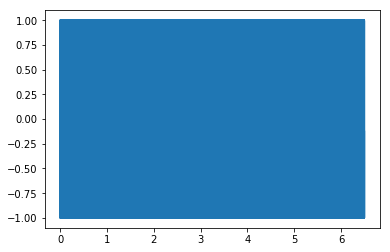

In [6]:
plt.plot(scalet, scale)

You can see the sinusoids better if you zoom in

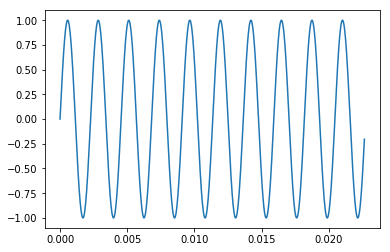

In [7]:
Nzoom = 1000
plt.plot(scalet[:Nzoom], scale[:Nzoom])

Let's listen to the effect of running this through a first order filter.

$$G_f = \frac{1}{\tau s + 1}$$

We'll use the convolution, so we first obtain the impulse response

In [8]:
omega = 440*twopi  # (440 cycles/second)*(2 pi radians / cycle)
tau = 1/omega
first_order_impulse = numpy.exp(-t/tau)

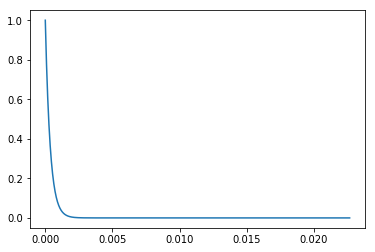

In [9]:
plt.plot(t[:Nzoom], first_order_impulse[:Nzoom])

Then we calculate the output signal via convolution.

In [10]:
filtered = numpy.convolve(scale, first_order_impulse, 'same')/len(scale)*len(first_order_impulse)

As a side note: This is not how filtering is done in practice, you can see this process takes a while.

In [11]:
Audio(filtered, rate=fs)

Can you hear how the sound gets softer as the frequency goes up? This is the effect of the filter. If we plot the whole waveform we can clearly see the amplitude going down in steps.

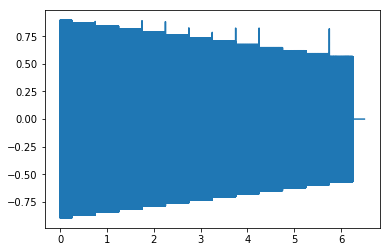

In [12]:
plt.plot(scalet, filtered)

When we zoom in so that we can see the wave forms, we can see that the low frequencies are attenuated less than the high frequencies.

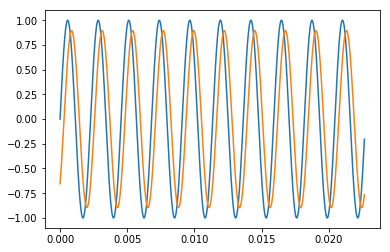

In [13]:
plt.plot(scalet[:Nzoom], scale[:Nzoom],
         scalet[:Nzoom], filtered[:Nzoom])

In [14]:
start = int(fs/T)*3

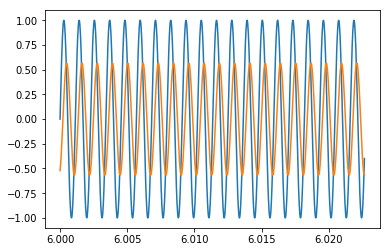

In [15]:
plt.plot(scalet[start:start+Nzoom], scale[start:start+Nzoom],
         scalet[start:start+Nzoom], filtered[start:start+Nzoom])

Now, try to load your favourite song and filter it with the first order filter. How does it sound?

You can convert from MP3 to wav using one of [these techniques](http://www.wikihow.com/Convert-MP3-to-WAV)

In [16]:
import scipy.io.wavfile

I've used "R.A.P. Music" by Killer Mike here. I think 7 seconds falls within fair use. You might want to use your own favourite song to hear the differences clearly.

In [17]:
samplingrate, song = scipy.io.wavfile.read('rapmusic.wav')

In [18]:
samplelength = 7*samplingrate
songsample = song.sum(axis=1)[:samplelength]

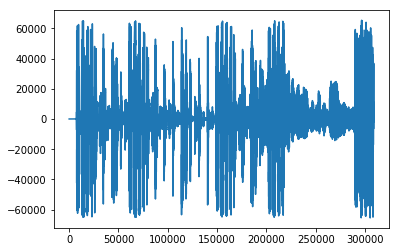

In [19]:
plt.plot(songsample)

Let's first hear what it sounds like unfiltered.

In [20]:
Audio(songsample, rate=samplingrate)

In [21]:
def filtersignal(signal):
    return numpy.convolve(signal, first_order_impulse)[:len(signal)]

Now with one pass through the filter

In [22]:
filtered = filtersignal(songsample)
Audio(filtered, rate=samplingrate)

We can filter the signal a second time to really hear the high notes fall away.

In [23]:
filtered = filtersignal(filtered)
Audio(filtered, rate=samplingrate)

Let's see what the effect of the filter looks like as a function of frequency.

In [24]:
omega = numpy.logspace(0, 5, 1000)

In [25]:
s = 1j*omega

In [26]:
Gw = 1/(tau*s + 1)

In [27]:
gain = numpy.abs(Gw)

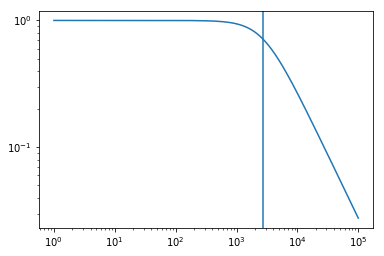

In [28]:
plt.loglog(omega, gain)
plt.axvline(1/tau)